# Import the libraries and MNIST dataset:-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

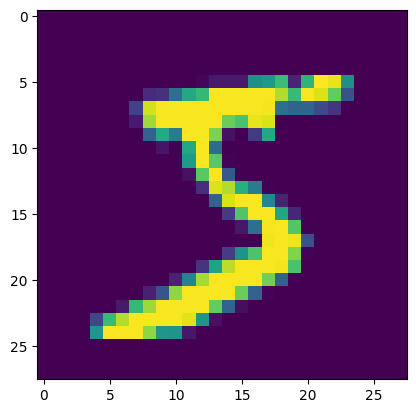

In [8]:
plt.imshow(x_train[0])

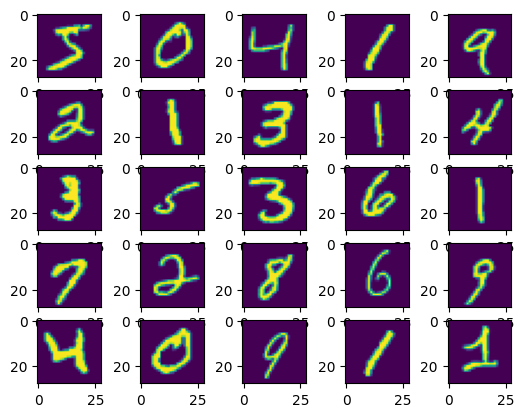

<Figure size 1600x900 with 0 Axes>

In [9]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
plt.figure(figsize = (16,9))
plt.show()

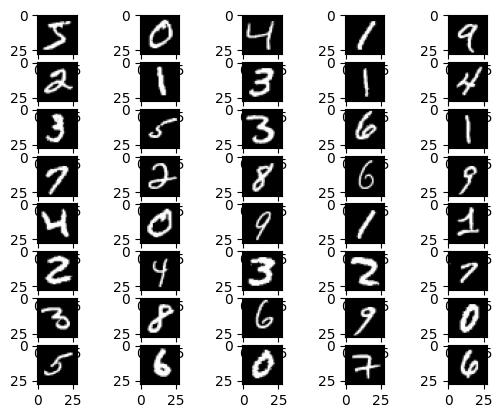

<Figure size 1600x900 with 0 Axes>

In [10]:
for i in range(40):
    plt.subplot(8,5,i+1)
    plt.imshow(x_train[i],cmap = "gray")
plt.figure(figsize = (16,9))
plt.show()

# Reshape the dataset:-

In [11]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_test.shape

(10000, 784)

In [14]:
# Normalize the value between 0 to 1
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from keras.utils import np_utils

In [17]:
batch_size = 130
epochs = 30
num_classes = 10

In [18]:
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_test.shape

(10000, 10)

# Create Neural Network:-

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create architecture:-

In [22]:
model = Sequential()

# first hidden layer
model.add(Dense(100,activation = "relu",input_shape = (784,)))

# second hidden layer
model.add(Dense(64,activation = "relu"))

# third hidden layer
model.add(Dense(32,activation = "relu"))

# output layer
model.add(Dense(10,activation = "softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


# Compile the model:-

In [24]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [25]:
history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,validation_data = (x_test,y_test))

Epoch 1/30
462/462 [==============================] - 10s 8ms/step - loss: 0.3683 - accuracy: 0.8935 - val_loss: 0.1703 - val_accuracy: 0.9489
Epoch 2/30
462/462 [==============================] - 3s 6ms/step - loss: 0.1436 - accuracy: 0.9578 - val_loss: 0.1199 - val_accuracy: 0.9650
Epoch 3/30
462/462 [==============================] - 3s 6ms/step - loss: 0.1034 - accuracy: 0.9691 - val_loss: 0.1049 - val_accuracy: 0.9695
Epoch 4/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0983 - val_accuracy: 0.9713
Epoch 5/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0937 - val_accuracy: 0.9724
Epoch 6/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0943 - val_accuracy: 0.9736
Epoch 7/30
462/462 [==============================] - 3s 6ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0874 - val_accuracy: 0.9749
Epoch

# Evaluate the model:-

In [26]:
score = model.evaluate(x_train,y_train)
print("Training Loss :",score[0])
print("Training Accuracy :",score[1])

1875/1875 [==============================] - 18s 4ms/step - loss: 0.0091 - accuracy: 0.9966
Training Loss : 0.009079014882445335
Training Accuracy : 0.996566653251648


In [27]:
score = model.evaluate(x_test,y_test)
print("Validation Loss :",score[0])
print("Validation Accuracy :",score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1418 - accuracy: 0.9766
Validation Loss : 0.14180678129196167
Validation Accuracy : 0.9765999913215637


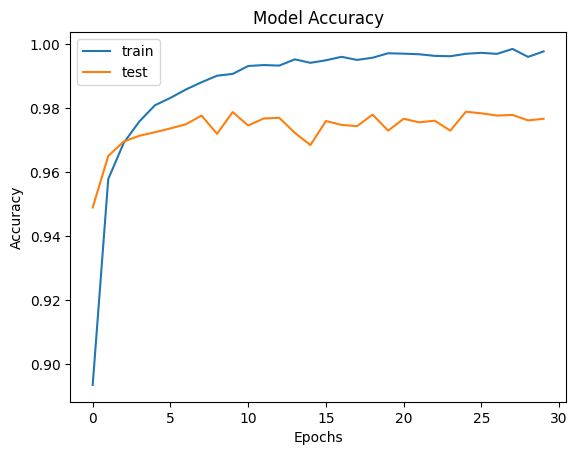

In [28]:
# plot the accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"],loc = "best")
plt.show()

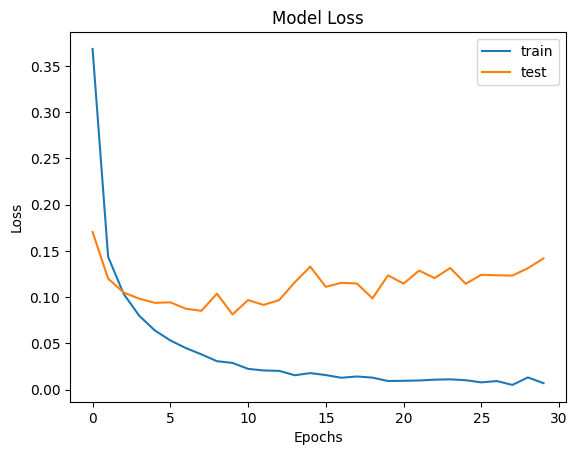

In [29]:
# plot the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"],loc = "best")
plt.show()

# Predict the model:-

In [30]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 4s 4ms/step


array([[1.7390003e-15, 3.5650716e-09, 7.3118669e-14, ..., 1.0000000e+00,
        1.5000852e-14, 6.0657500e-11],
       [5.5626429e-20, 1.5036490e-10, 1.0000000e+00, ..., 1.0212475e-11,
        5.2071991e-14, 9.0384133e-17],
       [1.2703352e-13, 9.9999142e-01, 1.0341078e-09, ..., 8.4289059e-06,
        4.8167731e-08, 1.3260433e-10],
       ...,
       [7.9960320e-22, 5.8714544e-17, 1.2337632e-20, ..., 1.1144030e-14,
        6.3366522e-17, 4.4803878e-12],
       [1.9025871e-16, 1.9303206e-19, 4.6846235e-21, ..., 2.0270733e-14,
        5.3032499e-11, 2.5907757e-12],
       [5.0317526e-15, 1.1219800e-19, 1.3576425e-19, ..., 3.8532293e-22,
        2.9018126e-20, 1.5858534e-26]], dtype=float32)